In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [3]:
#Import the NeuroElectro Data
df = pd.read_excel ('neurophysiology_data.xlsx')
mouse_df = pd.DataFrame (df)
mouse_df

#pull out all the rows where "CA3" is in the NeuroType column and create a new DataFrame 
df_CA3 = df[df['NeuronType'].str.contains('CA3')].reset_index(drop=True)
df_CA3

#did the same thing for CA1 cells 
df_CA1 = df[df['NeuronType'].str.contains('CA1')].reset_index(drop=True)
df_CA1

#get all the columns of df_CA3 with ephys we are interested in
print(df_CA3[['FiringFrequency','SpikeHalfWidth','SpikeAmplitude']])

#did the same thing for df_CA1
print(df_CA1[['FiringFrequency','SpikeHalfWidth','SpikeAmplitude']])

    FiringFrequency  SpikeHalfWidth  SpikeAmplitude
0               NaN            0.54             NaN
1               NaN            0.84             NaN
2               NaN            1.70            85.0
3               NaN            0.79             NaN
4               NaN            1.70            80.0
5             118.0             NaN            74.5
6               NaN            0.55            92.2
7               NaN            1.30            73.9
8               NaN            1.18             NaN
9               NaN             NaN             NaN
10              NaN            1.10            76.0
11              NaN            0.57             NaN
    FiringFrequency  SpikeHalfWidth  SpikeAmplitude
0               NaN            0.40             NaN
1               NaN             NaN             NaN
2               NaN             NaN             NaN
3               NaN            0.67             NaN
4             206.0             NaN             NaN
5           

In [4]:

# Import the Neuropixels Cache
from allensdk.brain_observatory.ecephys.ecephys_project_cache import EcephysProjectCache

# We have all of this data on the datahub! This is where it lives.
manifest_path = '/datasets/allen-brain-observatory/visual-coding-neuropixels/ecephys-cache/manifest.json' 

# Create the EcephysProjectCache object
cache = EcephysProjectCache.fixed(manifest=manifest_path)

# Get the sessions available in this dataset
sessions = cache.get_session_table()
session_ca1_list = []

for idx,structure_list in enumerate(sessions['ecephys_structure_acronyms']):
    if 'CA1' in structure_list:
        session_ca1_list.append(sessions.index[idx])   

session_ca3_list = []

for idx,structure_list in enumerate(sessions['ecephys_structure_acronyms']):
    if 'CA3' in structure_list:
        session_ca3_list.append(sessions.index[idx]) 
        
        
session = cache.get_session_data(session_ca3_list[0])
allen_ca3 = session.units[session.units.ecephys_structure_acronym=='CA3']
allen_ca3_amplitude = allen_ca3['waveform_amplitude']
allen_ca3_half_width = allen_ca3['waveform_halfwidth']
allen_ca3_firing_rate = allen_ca3['firing_rate']

session_a = cache.get_session_data(session_ca1_list[0])
allen_ca1 = session_a.units[session.units.ecephys_structure_acronym == 'CA1']
allen_ca1_amplitude = allen_ca1['waveform_amplitude']
allen_ca1_half_width = allen_ca1['waveform_halfwidth']
allen_ca1_firing_rate = allen_ca1['firing_rate']

print(allen_ca1_firing_rate)

unit_id
950911195     8.201781
950911223    15.087965
950911266    23.864839
950911286     2.396609
950912928     0.983724
               ...    
950954922     3.566261
950955053    16.898391
950955212     4.665299
950955361     3.913271
950955399    24.848122
Name: firing_rate, Length: 145, dtype: float64


In [5]:
# Create a session list for CA1 based on some criteria from Neuropixels

session_ca1_list = []

for idx,structure_list in enumerate(sessions['ecephys_structure_acronyms']):
    if 'CA1' in structure_list:
        session_ca1_list.append(sessions.index[idx])   
        
print('There are '+str(len(session_ca1_list))+' sessions that meet this criteria:')
print(session_ca1_list)

There are 52 sessions that meet this criteria:
[715093703, 719161530, 721123822, 743475441, 744228101, 746083955, 750332458, 750749662, 751348571, 754312389, 754829445, 755434585, 756029989, 757216464, 757970808, 758798717, 759883607, 760345702, 761418226, 762602078, 763673393, 766640955, 767871931, 768515987, 771160300, 771990200, 773418906, 774875821, 778240327, 778998620, 779839471, 781842082, 786091066, 787025148, 789848216, 791319847, 793224716, 794812542, 797828357, 798911424, 799864342, 816200189, 819186360, 819701982, 821695405, 829720705, 831882777, 835479236, 839068429, 839557629, 840012044, 847657808]


In [6]:

session_ca3_list = []

for idx,structure_list in enumerate(sessions['ecephys_structure_acronyms']):
    if 'CA3' in structure_list:
        session_ca3_list.append(sessions.index[idx])   
        
print('There are '+str(len(session_ca3_list))+' sessions that meet this criteria:')
print(session_ca3_list)

There are 50 sessions that meet this criteria:
[715093703, 719161530, 721123822, 743475441, 744228101, 746083955, 750332458, 750749662, 751348571, 754312389, 754829445, 755434585, 756029989, 757216464, 757970808, 759883607, 760345702, 761418226, 762602078, 763673393, 766640955, 767871931, 768515987, 771160300, 771990200, 773418906, 774875821, 778240327, 778998620, 779839471, 781842082, 786091066, 787025148, 789848216, 791319847, 793224716, 794812542, 797828357, 798911424, 799864342, 816200189, 819186360, 819701982, 821695405, 829720705, 835479236, 839068429, 839557629, 840012044, 847657808]


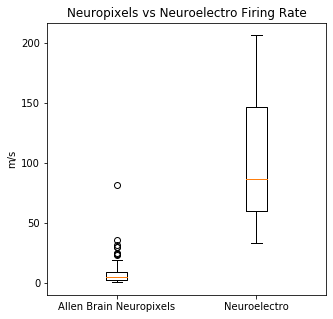

In [6]:
#FIRING RATE BOX PLOT FOR CA1
fig,ax = plt.subplots(figsize=(5,5))
data = [allen_ca1_firing_rate, df_CA1['FiringFrequency'].dropna()]
plt.boxplot(data)
ax.set_xticklabels(['Allen Brain Neuropixels','Neuroelectro'])
ax.set_ylabel('m/s')
ax.set_title('Neuropixels vs Neuroelectro Firing Rate')
plt.show()

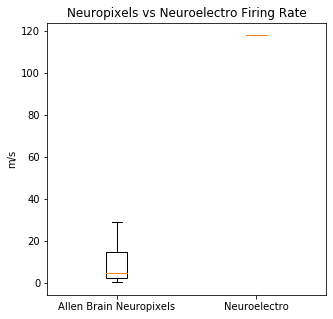

In [7]:

#FIRING RATE FOR CA3
fig,ax = plt.subplots(figsize=(5,5))
data = [allen_ca3_firing_rate, df_CA3['FiringFrequency'].dropna()]
plt.boxplot(data)
ax.set_xticklabels(['Allen Brain Neuropixels','Neuroelectro'])
ax.set_ylabel('m/s')
ax.set_title('Neuropixels vs Neuroelectro Firing Rate')
plt.show()

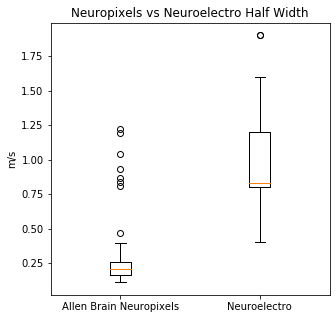

In [8]:
#SPIKE WIDTH BOX PLOT FOR CA1
fig,ax = plt.subplots(figsize=(5,5))
data = [allen_ca1_half_width, df_CA1['SpikeHalfWidth'].dropna()]
plt.boxplot(data)
ax.set_xticklabels(['Allen Brain Neuropixels','Neuroelectro'])
ax.set_ylabel('m/s')
ax.set_title('Neuropixels vs Neuroelectro Half Width')
plt.show()

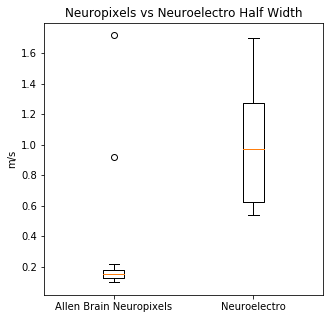

In [9]:

#BOXPLOT FOR SPIKE HALF WIDTH FOR CA3
fig,ax = plt.subplots(figsize=(5,5))
data = [allen_ca3_half_width.dropna(), df_CA3['SpikeHalfWidth'].dropna()]
plt.boxplot(data)
ax.set_xticklabels(['Allen Brain Neuropixels','Neuroelectro'])
ax.set_ylabel('m/s')
ax.set_title('Neuropixels vs Neuroelectro Half Width')
plt.show()

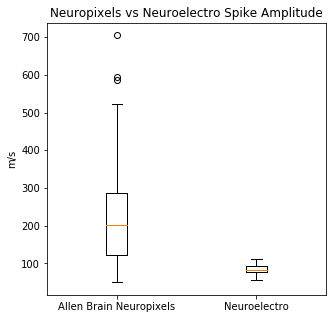

In [17]:
fig,ax = plt.subplots(figsize=(5,5))
data = [allen_ca1_amplitude.dropna(), df_CA1['SpikeAmplitude'].dropna()]
plt.boxplot(data)
ax.set_xticklabels(['Allen Brain Neuropixels','Neuroelectro'])
ax.set_ylabel('m/s')
ax.set_title('Neuropixels vs Neuroelectro Spike Amplitude')
plt.show()

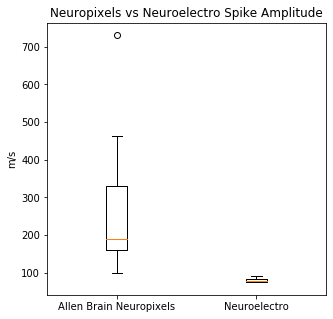

In [18]:
fig,ax = plt.subplots(figsize=(5,5))
data = [allen_ca3_amplitude.dropna(), df_CA3['SpikeAmplitude'].dropna()]
plt.boxplot(data)
ax.set_xticklabels(['Allen Brain Neuropixels','Neuroelectro'])
ax.set_ylabel('m/s')
ax.set_title('Neuropixels vs Neuroelectro Spike Amplitude')
plt.show()

In [20]:
from scipy import stats
print(stats.describe(df_CA1['SpikeHalfWidth'].dropna()))
print(stats.describe(df_CA3['SpikeHalfWidth'].dropna()))
print(stats.describe(df_CA1['FiringFrequency'].dropna()))
print(stats.describe(df_CA3['FiringFrequency'].dropna()))
print(stats.describe(df_CA1['SpikeAmplitude'].dropna()))
print(stats.describe(df_CA3['SpikeAmplitude'].dropna()))


DescribeResult(nobs=17, minmax=(0.4, 1.9), mean=1.0452941176470587, variance=0.1907764705882353, skewness=0.8466614489741058, kurtosis=-0.3805757644850307)
DescribeResult(nobs=10, minmax=(0.54, 1.7), mean=1.0270000000000001, variance=0.19708999999999996, skewness=0.3943833909947903, kurtosis=-1.1806692296973336)
DescribeResult(nobs=3, minmax=(33.2, 206.0), mean=108.39999999999999, variance=7841.28, skewness=0.4349828375463192, kurtosis=-1.4999999999999996)
DescribeResult(nobs=1, minmax=(118.0, 118.0), mean=118.0, variance=nan, skewness=0.0, kurtosis=-3.0)
DescribeResult(nobs=13, minmax=(56.0, 112.0), mean=83.14307692307692, variance=273.7930730769231, skewness=0.004994652097478402, kurtosis=-0.5579066505129573)
DescribeResult(nobs=6, minmax=(73.9, 92.2), mean=80.26666666666667, variance=51.37466666666667, skewness=0.7603035444467767, kurtosis=-0.8302627471344834)
